 ## Simulated Dataset Generation
 When generating the datasets for this analysis, random noise will also be added
 to both the baseline curve and the target signal.  The purpose of this notebook is to
 show some examples of the generated signals.

In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd 
from scipy.stats import norm    

mpl.style.use('seaborn-notebook')
plt.rcParams["figure.figsize"] = (12, 5)


In [2]:
xnum = 600
np.random.seed(42)
x = np.arange(0, xnum, 1.0)

# setup the signal generation distributions
S_1 = norm.pdf(x, loc=310.0, scale=40.0)
S_2 = norm.pdf(x, loc=390.0, scale=20.0)
S_3 = norm.pdf(x, loc=360.0, scale=120.0)
S_true = np.vstack((S_1, S_2))

# generate signals at the normal boundary values
C_true = np.array([[0.35, 0.65], [0.65, 0.35]])
signal = np.dot(C_true, S_true)

# define baselines
E1_ = (-1e-7*x**2.1)
E1F_ = E1_ + np.min(E1_)*-1.0
E2_ = (-1e-7*x**2.2)
E2F_ = E2_ + np.min(E2_)*-1.0


 ### Baseline Noise
 The following plot shows the baseline minimum and maximum curves with random noise.

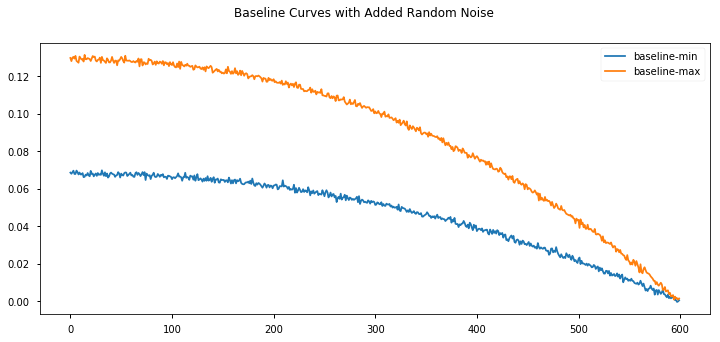

In [3]:
fig, axs = plt.subplots()
bnoise1 = 0.00100 * np.random.normal(size=xnum)  
bnoise2 = 0.00100 * np.random.normal(size=xnum)         
axs.plot(x, E1F_+bnoise1, label='baseline-min')
axs.plot(x, E2F_+bnoise2, label='baseline-max')    
fig.suptitle('Baseline Curves with Added Random Noise')
plt.legend()


 ### Signal Noise
 The following plot shows an example of the target signal with random noise.

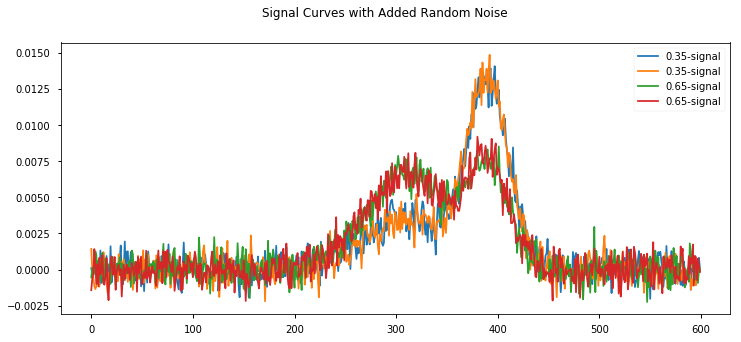

In [4]:
fig, axs = plt.subplots()
for i, level in enumerate(C_true):
    noise1 = 0.00075 * np.random.normal(size=xnum)   
    noise2 = 0.00075 * np.random.normal(size=xnum)          
    axs.plot(x, signal[i]+noise1, label='{0:.2f}-signal'.format(C_true[i, 0]))
    axs.plot(x, signal[i]+noise2, label='{0:.2f}-signal'.format(C_true[i, 0]))    
fig.suptitle('Signal Curves with Added Random Noise')
plt.legend()


 ### Simulated Signal
 The following plot shows an example of the input signal that will be used for this
 analysis.  This sample plot is only showing the baseline curve without the additional
 Gaussian adjustment.

 ### Classification Problem Definition
 The goal of this project is to determine how well the different algorithms can classify
 the simulated signal when the concentration level is out of bounds.  The following plots
 will show an example of both a normal and abnormal concentration level.

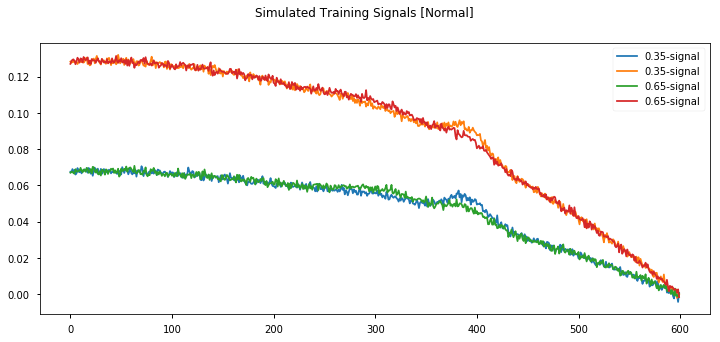

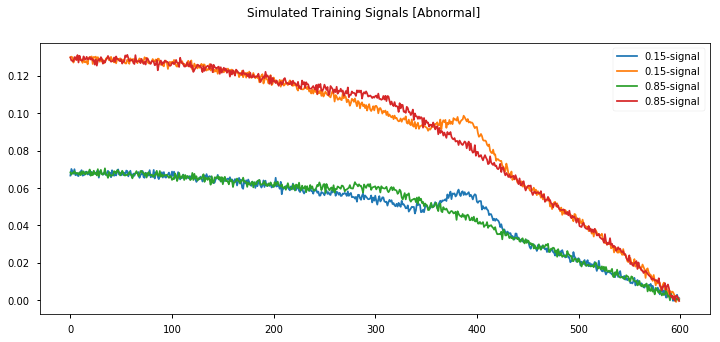

In [5]:
fig, axs = plt.subplots()
for i, level in enumerate(C_true):
    bnoise1 = 0.00100 * np.random.normal(size=xnum)  
    bnoise2 = 0.00100 * np.random.normal(size=xnum)      
    noise1 = 0.00075 * np.random.normal(size=xnum)   
    noise2 = 0.00075 * np.random.normal(size=xnum)          
    axs.plot(x, signal[i]+E1F_+bnoise1+noise1, label='{0:.2f}-signal'.format(C_true[i, 0]))
    axs.plot(x, signal[i]+E2F_+bnoise2+noise2, label='{0:.2f}-signal'.format(C_true[i, 0]))    
fig.suptitle('Simulated Training Signals [Normal]')
plt.legend()

# generate signals at an abnormal concentration level
C_true = np.array([[0.15, 0.85], [0.85, 0.15]])
signal = np.dot(C_true, S_true)

fig, axs = plt.subplots()
for i, level in enumerate(C_true):
    bnoise1 = 0.00100 * np.random.normal(size=xnum)  
    bnoise2 = 0.00100 * np.random.normal(size=xnum)      
    noise1 = 0.00075 * np.random.normal(size=xnum)   
    noise2 = 0.00075 * np.random.normal(size=xnum)          
    axs.plot(x, signal[i]+E1F_+bnoise1+noise1, label='{0:.2f}-signal'.format(C_true[i, 0]))
    axs.plot(x, signal[i]+E2F_+bnoise2+noise2, label='{0:.2f}-signal'.format(C_true[i, 0]))    
fig.suptitle('Simulated Training Signals [Abnormal]')
plt.legend()
